__The CAPM model, Markowitz's efficient frontier and portfolio optimisation__

The CAPM (Capital Asset Pricing Model) is a model that aims to determine the expected rate of return of an asset, simply knowing the risk-free rate of return (usually the 10-years US T-bills today around 2.5% per annum), and the market expected return (we often use the S&P500 as a proxy).

According to this model, some of the risk associated with a portfolio (measured by its volatility) can be reduced without any sacrifice in expected return, simply by using diversification.
It makes sense when looking at the variance formula of a portfolio :
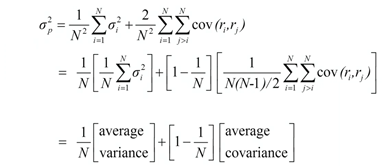

As we can see, as N grows (we add assets to our portfolio), 1/N tends to 0, so the average variance of each stock doesn't impact the variance of the portfolio : it all depends on the average covariance.

Therefore, the CAPM models shows us that correlation among the assets of our portfolio matters more than their individual price volatility, for our portfolio variance.
Some of the risk is due to firm-specific risks (asset volatility) that can be diversified away, and the rest is due to market-risks (assets correlation).


In this study I came up with a diversified portfolio, composed of 5 assets. Our goal will be to test the CAPM model and see what is the optimal portfolio according to this theory.
We will also look at the portfolio offering the highest expected return for a given level of volatility, during the period 2015 - 2019.


The portfolio will include the following assets :

Large cap : Apple (1st on the Russel 1000 Growth Index and Warren Buffet's favourite) <br>
Growth stock : Tesla (Morgan Stanley's highest earning-per-share growth prevision in 2015 (134%), in their annual list of secular growth stocks)<br>
Value Stock : JP Morgan (1st of the Russel 1000 Value Index)<br>
Real Estate : American Tower (top 3 largest market cap of the real estate industry in 2015).<br>
Raw material : Gold

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader.data import DataReader
from datetime import date
import quandl
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

- Collecting the stocks data

In [2]:
# Stocks for our portfolio
tickers = ['AAPL', 'AMT', 'GLD', 'JPM', 'TSLA']

# Reading financial data
start = date(2015, 1, 1)
end = date(2019, 1, 1)
data = DataReader(tickers, 'iex', start, end)['close']

#Setting the index as Datetime
data['Date'] = pd.to_datetime(data.index)
data = data.set_index('Date')

data.head()

Symbols,AAPL,AMT,GLD,JPM,TSLA
Date,,,,,
2015-01-02,101.1385,91.4685,114.08,55.9597,219.310
2015-01-05,98.2893,90.1470,115.80,54.2224,210.090
2015-01-06,98.2985,89.9084,117.12,52.8165,211.280
2015-01-07,99.6769,90.8536,116.43,52.8971,210.950
2015-01-08,103.5067,91.6979,115.94,54.0791,210.615


We now have the daily stock prices. It's time to compute the average rate of return and the volatility !

In [3]:
# Create separate dataframe for each stock

aapl = data[['AAPL']]
aapl.columns = ['Price']

amt = data[['AMT']]
amt.columns = ['Price']

gld = data[['GLD']]
gld.columns = ['Price']

jpm = data[['JPM']]
jpm.columns = ['Price']

tlsa = data[['TSLA']]
tlsa.columns = ['Price']

amt.head()

,Price
Date,
2015-01-02,91.4685
2015-01-05,90.1470
2015-01-06,89.9084
2015-01-07,90.8536
2015-01-08,91.6979


In [4]:
# Add the daily variation and the cumulative performance since 01/01/2015

for stock in (aapl, amt, gld, jpm, tlsa) :
    # Daily variation
    stock.loc[:,'Daily perf'] = stock.loc[:,'Price'].pct_change()
    
    # Cumulative stock performance
    stock.loc[:,'Cumul return'] = stock.loc[:,'Price'] / stock.iloc[0]['Price']
    
amt.head()

,Price,Daily perf,Cumul return
Date,,,
2015-01-02,91.4685,NaN,1.000000
2015-01-05,90.1470,-0.014448,0.985552
2015-01-06,89.9084,-0.002647,0.982944
2015-01-07,90.8536,0.010513,0.993277
2015-01-08,91.6979,0.009293,1.002508


In [5]:
# Variation of the stock weight on our portfolio

# Assets allocation
weight = [.25, .25, .1, .1, .3]
stocks = (aapl, amt, gld, jpm, tlsa)

# Day-to-day amount invested in the stock
for stock, weight in zip(stocks, weight):
    # initial portfolio of 10 000$
    stock.loc[:,'Allocation'] = stock['Cumul return'] * weight * 10000  

gld.head()

,Price,Daily perf,Cumul return,Allocation
Date,,,,
2015-01-02,114.08,NaN,1.000000,1000.000000
2015-01-05,115.80,0.015077,1.015077,1015.077139
2015-01-06,117.12,0.011399,1.026648,1026.647966
2015-01-07,116.43,-0.005891,1.020600,1020.599579
2015-01-08,115.94,-0.004209,1.016304,1016.304348


In [6]:
# Combine the allocations in the same df
portfolio = pd.concat([aapl['Allocation'], amt['Allocation'], gld['Allocation'], 
                       jpm['Allocation'], tlsa['Allocation']], axis=1)

#Renaming columns
portfolio.columns = ['AAPL', 'AMT', 'GLD', 'JPM', 'TLSA']

#Overall portfolio balance
portfolio['Total'] = portfolio.sum(axis=1)

# Create a datetime index
portfolio.index = pd.to_datetime(portfolio.index)

portfolio.head()

,AAPL,AMT,GLD,JPM,TLSA,Total
Date,,,,,,
2015-01-02,2500.000000,2500.000000,1000.000000,1000.000000,3000.000000,10000.000000
2015-01-05,2429.571825,2463.881008,1015.077139,968.954444,2873.877160,9751.361576
2015-01-06,2429.799236,2457.359637,1026.647966,943.831007,2890.155488,9747.793334
2015-01-07,2463.871325,2483.193668,1020.599579,945.271329,2885.641330,9798.577231
2015-01-08,2558.538539,2506.269918,1016.304348,966.393673,2881.058775,9928.565252


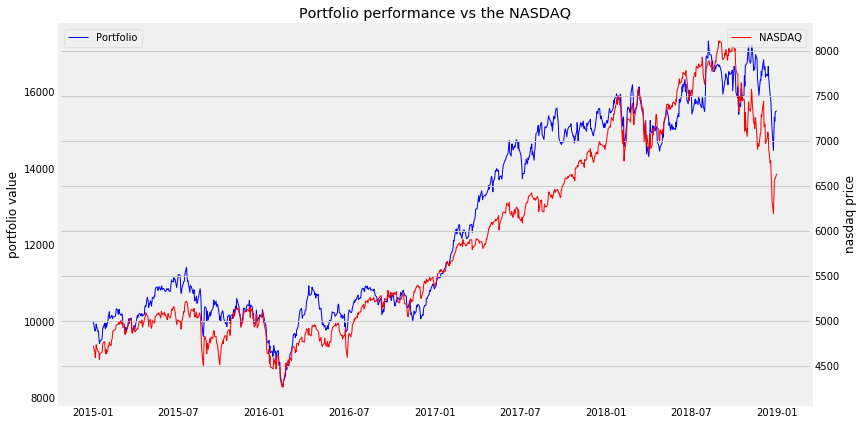

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

# Evolution of our portfolio balance
ax.plot(portfolio['Total'], linewidth=1, label='Portfolio', color='b')
plt.legend(loc="upper left")
ax.set_ylabel('portfolio value')

# Get NASDAQ daily price
nasdaq = quandl.get('NASDAQOMX/COMP-NASDAQ', start_date = start, end_date = end)['Index Value']

# Graph of the NASDAQ index
ax1 = ax.twinx()
ax1.plot(nasdaq, linewidth=1, label='NASDAQ', color='r')
plt.legend(loc='upper right')
ax1.set_ylabel('nasdaq price')
ax.grid(False)

plt.title('Portfolio performance vs the NASDAQ')

plt.show()

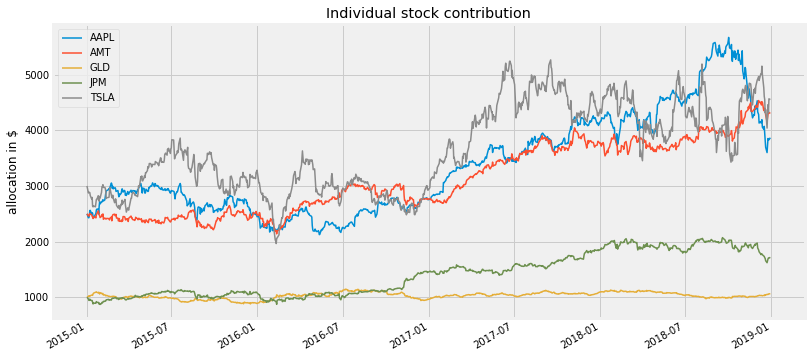

In [8]:
# Relative performance of each stock
fig, ax = plt.subplots(figsize=(12, 6))

# Select the stock allocation columns
portfolio.drop('Total', axis=1).plot(linewidth=1.5, ax=ax)

#Set title, legend, axis labels
plt.title('Individual stock contribution')
plt.legend(labels=['AAPL', 'AMT', 'GLD', 'JPM', 'TSLA'])
plt.ylabel('allocation in $')
plt.xlabel('')

plt.show()

In [9]:
total_return = ((portfolio['Total'][-1] - portfolio['Total'][0]) / portfolio['Total'][0])

nasdaq_return = (nasdaq[-1] - nasdaq[0]) / nasdaq[0]

print('Our investments rate of return for the 2015-2019 period was', "{0:.0%}".format(total_return))
print('At the same time, our benchmark (NASDAQ) delivered', "{0:.0%}".format(nasdaq_return))

Our investments rate of return for the 2015-2019 period was 55%
At the same time, our benchmark (NASDAQ) delivered 40%


- Explanation of the return and variance computation



Annual rate of return formula : 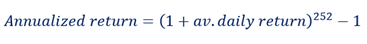

I raised the cumulative return to power 252 and not 365, as it's the number of trading days in a given year.


Annual volatility formula : 

We take the standard deviation of the average daily return (in %), and then annualize it on a 252 days-basis.


Sharpe Ratio : 

We compute the excess return of our stock over a risk-free investment (asset return - risk-free rate), and divide it by unit of risk (volatility).


Therefore, the Sharpe Ratio informs us of how well a stock performs comparing to a risk-free investment (if the Sharpe Ratio is positive, the stocks performs better, and conversely), and wether this performance is achieved at a moderate risk (Sharpe Ratio > 1), or not.

In [10]:
# Portfolio return, volatility, Sharpe Ratio

annualized_return = ((np.mean(portfolio['Total'].pct_change() + 1)) ** 252 - 1)

annualized_vol = np.std(portfolio['Total'].pct_change()) * np.sqrt(252)

Sharpe_Ratio = (annualized_return - 0.025) / annualized_vol  # 2.5% risk-free rate

print('Our portfolio delivered a', "{0:.1%}".format(annualized_return), 
      'annual return, with a', "{0:.1%}".format(annualized_vol), 
      'volatility rate, resulting in a Sharpe Ratio of', "{0:.2f}".format(Sharpe_Ratio))

Our portfolio delivered a 13.6% annual return, with a 18.5% volatility rate, resulting in a Sharpe Ratio of 0.60


In [11]:
# Index return, volatility Sharpe Ratio

nasdaq_ann_return = ((np.mean(nasdaq.pct_change()+1)) ** 252 - 1)

nasdaq_ann_vol = np.std(nasdaq.pct_change()) * np.sqrt(252)

nasdaq_Sharpe_Ratio = (nasdaq_ann_return - 0.025) / nasdaq_ann_vol

print('In the meantime, the market delivered a', "{0:.1%}".format(nasdaq_ann_return), 
      'annual return, with ',"{0:.1%}".format(nasdaq_ann_vol), 
      'volatility, and a Sharpe Ratio of', "{0:.2f}".format(nasdaq_Sharpe_Ratio))

In the meantime, the market delivered a 10.3% annual return, with  16.3% volatility, and a Sharpe Ratio of 0.48


Therefore, we can say that our portfolio composed of 25% Apple and American Tower stocks, 10% of Gold and JP Morgan securities, and 30% of Tesla shares, did outperform its benchmark (the NASDAQ). It provided a 13.6% average annual return, 3.3% per year more than the market, with a moderate increase of volatility (2.2%).


What could be interesting to do is to look for the optimal portfolio allocation : the one with the highest return possible, for a certain amount of risk (= the largest Sharpe Ratio).
We'll use the CAPM model as well as the Markowitz efficient frontier theory to determine the ideal weight we should have assigned to each security.

In [12]:
# We work on this dataframe
data.head()

Symbols,AAPL,AMT,GLD,JPM,TSLA
Date,,,,,
2015-01-02,101.1385,91.4685,114.08,55.9597,219.310
2015-01-05,98.2893,90.1470,115.80,54.2224,210.090
2015-01-06,98.2985,89.9084,117.12,52.8165,211.280
2015-01-07,99.6769,90.8536,116.43,52.8971,210.950
2015-01-08,103.5067,91.6979,115.94,54.0791,210.615


__Simulation of 1000 portfolios__

First,we'll simulate the expected annual return, volatility and Sharpe Ratio over 1000 portfolios, with variations in the allocation (weights).

In [13]:
# Initialise variables
np.random.seed(53)
n = 1000  # number of simulated portfolio

port_return = np.zeros(n)
port_volatility = np.zeros(n)
port_SharpeRatio = np.zeros(n)
weights_matrix = np.zeros((n, len(data.columns)))

# Computing each portfolio annual expected return, volatility, Sharpe Ratio
for x in range(n) :
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights / np.sum(weights)
    weights_matrix[x:] = weights
    
    # Expected returns
    stock_return = ((data.pct_change().mean() + 1)**252 - 1) * 100
    port_return[x] = np.sum(stock_return * weights)
    
    # Expected volatility
    cov_matrix = (data.pct_change()*100).cov()
    port_volatility[x] = np.sqrt(np.linalg.multi_dot([weights.T, cov_matrix, weights])) * np.sqrt(252)

    # Sharpe Ratio
    port_SharpeRatio[x] = (port_return[x] - 2.5) / port_volatility[x]

In [14]:
# Metrics of the best portfolio
print('Best of the 1000 portfolios simulated','\n')

print('Sharpe Ratio :', "{0:.2f}".format(max(port_SharpeRatio)))
print('Annual rate of return :', "{0:.2f}".format(port_return[port_SharpeRatio.argmax()]), '%')
print('Annual volatility :', "{0:.2f}".format(port_volatility[port_SharpeRatio.argmax()]), '%', '\n')

print('Best portfolio assets allocation', '\n')

# Get the weight corresponding to the highest Sharpe Ratio
Asset = ['Apple', 'American Tower', 'Gold', 'JP Morgan', 'Tesla']
optimal_weight = weights_matrix[port_SharpeRatio.argmax()]

for stock in Asset :
      print(stock, "{0:.2%}".format(optimal_weight[Asset.index(stock)]))

Best of the 1000 portfolios simulated 

Sharpe Ratio : 0.93
Annual rate of return : 13.89 %
Annual volatility : 12.19 % 

Best portfolio assets allocation 

Apple 11.50%
American Tower 34.93%
Gold 20.98%
JP Morgan 28.43%
Tesla 4.16%


The Shape Ratio we obtained by simulating 1000 portfolio is way better than the one of our initial allocation : we now obtain a score of 0.93 compared to 0.6 initially. It beats the market by a wide margin now.

We manage to beat the initial portfolio allocation on every aspect : we can obtain both a higher rate of return (13.9% vs 10.3%), at a lesser risk (12.2% vs 16.3%). 

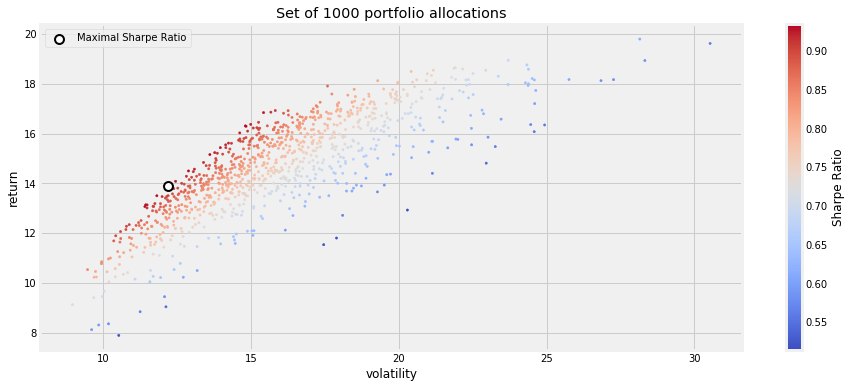

In [15]:
# Chart of the risk / return trade off of all our simulated portfolio
plt.figure(figsize=(14, 6))

plt.scatter(port_volatility, port_return, c=port_SharpeRatio, s=5, cmap='coolwarm')
plt.colorbar(label = 'Sharpe Ratio')

# Highest Sharpe Ratio portfolio
return_max_sr = port_return[port_SharpeRatio.argmax()]
vol_max_sr = port_volatility[port_SharpeRatio.argmax()]

plt.scatter(vol_max_sr, return_max_sr, s=80,facecolor='w', lw=2,
            edgecolor='k', label='Maximal Sharpe Ratio')

# Add labels and title
plt.xlabel('volatility')
plt.ylabel('return')
plt.title('Set of 1000 portfolio allocations')
plt.legend()

plt.show()

__Markowitz efficient frontier__

- Maximizing Sharpe Ratio

We now want to draw the Markowitz efficient frontier, to separate the optimal portfolio from the dominated ones.
For this, we need to define a few more functions and constraints : we'll use Scipy.optimize minimizer, to find the highest Sharpe Ratio.

Finding the maximal Sharpe Ratio is equivalent to finding the mimimum of its opposite (the negative Sharpe Ratio.
We'll also specify that the sum of the weights must be equal to 1. 

In [16]:
# Compute the annual return, volatility, Sharpe Ratio
def annual_metrics(weights):
    weights = np.array(weights)
    
    returns = np.sum(stock_return * weights)
   
    volatility = np.sqrt(np.linalg.multi_dot([weights.T, cov_matrix, weights])) * np.sqrt(252)

    SharpeRatio = (returns - 2.5) / volatility
    
    return np.array([returns, volatility, SharpeRatio])

# Test with a balanced portfolio
test = annual_metrics([0.2, 0.2, 0.2, 0.2, 0.2])
print('Annual return', "{0:.2f}".format(test[0]), "%")
print('Annual volatility', "{0:.2f}".format(test[1]), "%")
print('Sharpe Ratio', "{0:.2f}".format(test[-1]))

Annual return 14.69 %
Annual volatility 14.91 %
Sharpe Ratio 0.82


In [17]:
# Function to return the negative Sharpe Ratio
def neg_SharpeRatio(weights) :
    return annual_metrics(weights)[2] * (-1)
    
# The sum of all weights should always equal 1
def check_weights(weights) :
    return np.sum(weights) - 1  # return 0 is the sum is 1

neg_SharpeRatio([0.2, 0.2, 0.2, 0.2, 0.2])

-0.817170908665986

Inside the minimize function, we use the SLSQP method (Sequential Least Squares Programming), as it is the only one accepting bounds and constraints at the same time (which is central to our optimisation problem).

The 'bounds' argument define the weights range (here, between 0 and 1). <br>
Our constraint is to ensure the sum of weights is equal to 1. <br>
We also need to pass an initial guess argument (here a balanced portfolio where each stock weights for 20% of the total).

In [18]:
# Set the arguments used in scipy.optimize
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
initial_allocation = [0.2, 0.2, 0.2, 0.2, 0.2]
constraints = ({'type':'eq', 'fun' : check_weights})
             
# Minimize the negative Sharpe Ratio
from scipy.optimize import minimize

best_portfolio = minimize(neg_SharpeRatio, initial_allocation, method='SLSQP',
                          bounds=bounds, constraints=constraints)

# Key metrics of this optimal portfolio
best = annual_metrics(best_portfolio.x)

print('Optimal portfolio', '\n')
print('Sharpe Ratio :', "{0:.2f}".format(best[-1]))
print('Annual return :', "{0:.2f}".format(best[0]), "%")
print('Annual volatility :', "{0:.2f}".format(best[1]), "%", "\n")

print('The perfect asset allocation is', '\n')

Asset = ['Apple', 'American Tower', 'Gold', 'JP Morgan', 'Tesla']
for stock in Asset :
      print(stock, "{0:.2%}".format(best_portfolio.x[Asset.index(stock)]))


Optimal portfolio 

Sharpe Ratio : 0.94
Annual return : 14.55 %
Annual volatility : 12.77 % 

The perfect asset allocation is 

Apple 4.72%
American Tower 38.57%
Gold 18.11%
JP Morgan 32.43%
Tesla 6.17%


As we can see the optimizer works pretty well : we can achieve a very similar annual performance than the balanced portfolio (14.55% vs 14.69%), but with a substantial diminution of risk (12.77% vs 14.91% volatility) and a sensible increase of the Sharpe Ratio (0.94 vs 0.82).

We can even notice that the model found with the minimizer function gives a better portfolio allocation that any of the 1000 we calculated previously (Sharpe ratio of 0.94 vs 0.93, return of 14.5% vs 13.9%).<br>
If we compare the two portfolio allocations, the optimal model basically advice us to increase our exposition to JP Morgan (32.4% vs 28%), at the expense of a reduction of the weight of Apple (4.7% vs 11.5% before).

- Minimizing the risk

The efficient frontier in Markowitz's model indicates the portoflio that delivers the highest return, for a certain amount of risk. <br>
Therefore, we'll create a function similar to the one above, but this time we aim risk-minimization.

In [19]:
# Volatility of a given assets allocation
def portfolio_volatility(weights) :
    return annual_metrics(weights)[1]

The only modification concerns the constrains :<br>
We keep the constrain on the weights (sum = 1), and we add a new constrain : for each portfolio return (index 0 of the annual_metrics function), we'll find the minimum volatility.

In [20]:
# Create the efficient frontier
frontier_x = []
frontier_y = np.linspace(np.min(port_return-1), 
                         np.max(port_return+1), 200)

for returns in frontier_y :
    # Set of constraint : sum of weights of 1 and compute all possible returns for a given volatility
    constraints = ({'type':'eq', 'fun' : check_weights}, 
                  {'type':'eq', 'fun' : lambda w : annual_metrics(w)[0] - returns})
    
    result = minimize(portfolio_volatility, initial_allocation, method='SLSQP', 
                     bounds=bounds, constraints=constraints)
    
    # Add the result of our optimisation function
    frontier_x.append(result['fun'])

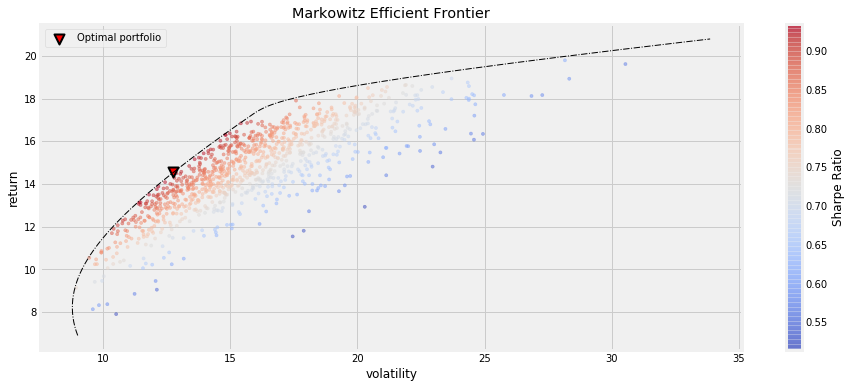

In [21]:
# Graph the efficient frontier
plt.figure(figsize=(14, 6))

# Scatter plot of the portfolios
plt.scatter(port_volatility, port_return, c=port_SharpeRatio, 
            s=10, marker='o', alpha=0.5, cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')

# Efficient frontier
plt.plot(frontier_x, frontier_y, 'k-.', linewidth=1)

# Optimal portfolio
plt.scatter(best[1], best[0], marker='v', s=100, facecolor='r', lw=2,
            edgecolor='k', label='Optimal portfolio')

# Set axis and labels
plt.title('Markowitz Efficient Frontier')

plt.xlabel('volatility')
plt.ylabel('return')
plt.legend()

plt.show()